<a href="https://colab.research.google.com/github/sallyMo14/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales
- Author : Sally Mo. Abdalatti



##Project Overview

##Load and Inspect Data

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import missingno as msno
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
fpath="/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df=pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [77]:
temp1_df=df.copy()
temp1_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Clean Data

In [6]:
df.shape

(8523, 12)

**There are 8523 rows and 12 columns**

In [79]:
df.duplicated().sum()

np.int64(0)

**There is no duplicated rows**

###Missing Values

In [80]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


**There are 1463 null values in Item_Weight**

**and 2410 null values in Outlet_Size**


In [81]:
df.isna().sum()/len(df)*100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


In [82]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


**We will fill the null Outlet_Size values with missing**

In [83]:
df['Outlet_Size'].fillna('Missing', inplace=True)
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [84]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Missing,2410
Small,2388
High,932


In [85]:
temp2_df=df.copy()


<Axes: >

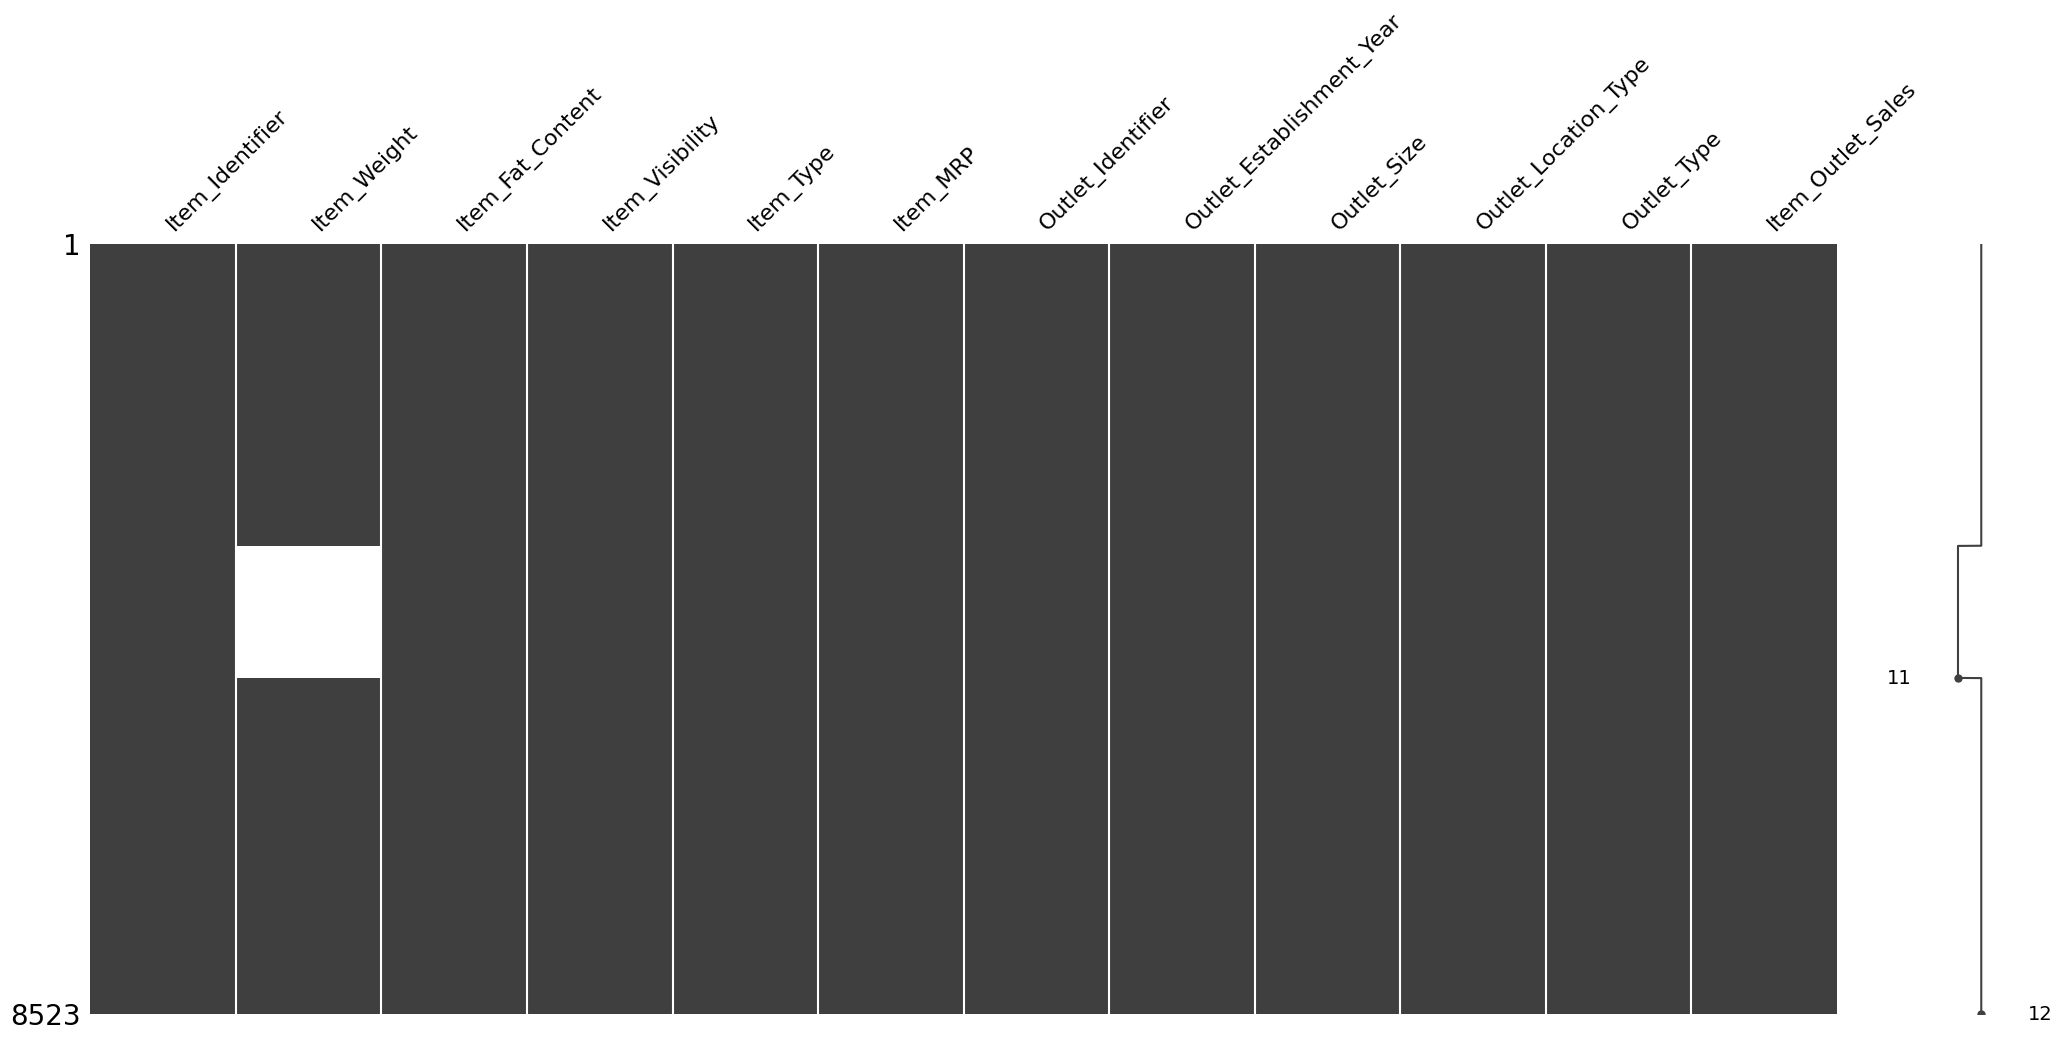

In [86]:
#sort the rows according to Item some columns
msno.matrix(temp2_df.sort_values(by='Outlet_Identifier'))

In [87]:
pd.set_option('display.max_rows', None)


In [88]:
null_item_weight_rows_filter= df['Item_Weight'].isna()
df[null_item_weight_rows_filter].sort_values(by='Outlet_Identifier').head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1776,FDX21,NaN,Low Fat,0.148765,Snack Foods,111.1912,OUT019,1985,Small,Tier 1,Grocery Store,109.1912
5862,NCE30,NaN,Low Fat,0.173574,Household,214.0902,OUT019,1985,Small,Tier 1,Grocery Store,1061.9510
5860,FDB33,NaN,Low Fat,0.025528,Fruits and Vegetables,157.5262,OUT019,1985,Small,Tier 1,Grocery Store,477.3786
3474,FDS12,NaN,LF,0.304859,Baking Goods,125.4362,OUT019,1985,Small,Tier 1,Grocery Store,755.0172
4026,FDN21,NaN,Low Fat,0.134564,Snack Foods,159.8236,OUT019,1985,Small,Tier 1,Grocery Store,322.2472
2062,FDE41,NaN,reg,0.000000,Frozen Foods,83.7566,OUT019,1985,Small,Tier 1,Grocery Store,253.6698
2055,FDQ36,NaN,Regular,0.000000,Baking Goods,38.1848,OUT019,1985,Small,Tier 1,Grocery Store,37.2848
7278,FDY32,NaN,Low Fat,0.226284,Fruits and Vegetables,163.2210,OUT019,1985,Small,Tier 1,Grocery Store,326.2420
4517,FDY34,NaN,Regular,0.019228,Snack Foods,163.9842,OUT019,1985,Small,Tier 1,Grocery Store,331.5684
2035,FDA38,NaN,Low Fat,0.044612,Dairy,241.1538,OUT019,1985,Small,Tier 1,Grocery Store,480.7076


In [89]:
df[null_item_weight_rows_filter].sort_values(by='Outlet_Identifier').value_counts('Outlet_Identifier')

,count
Outlet_Identifier,
OUT027,935
OUT019,528


###There is a relation between the missing item_weight celss and OUT027  , OUT019 outlet identifier

<Axes: >

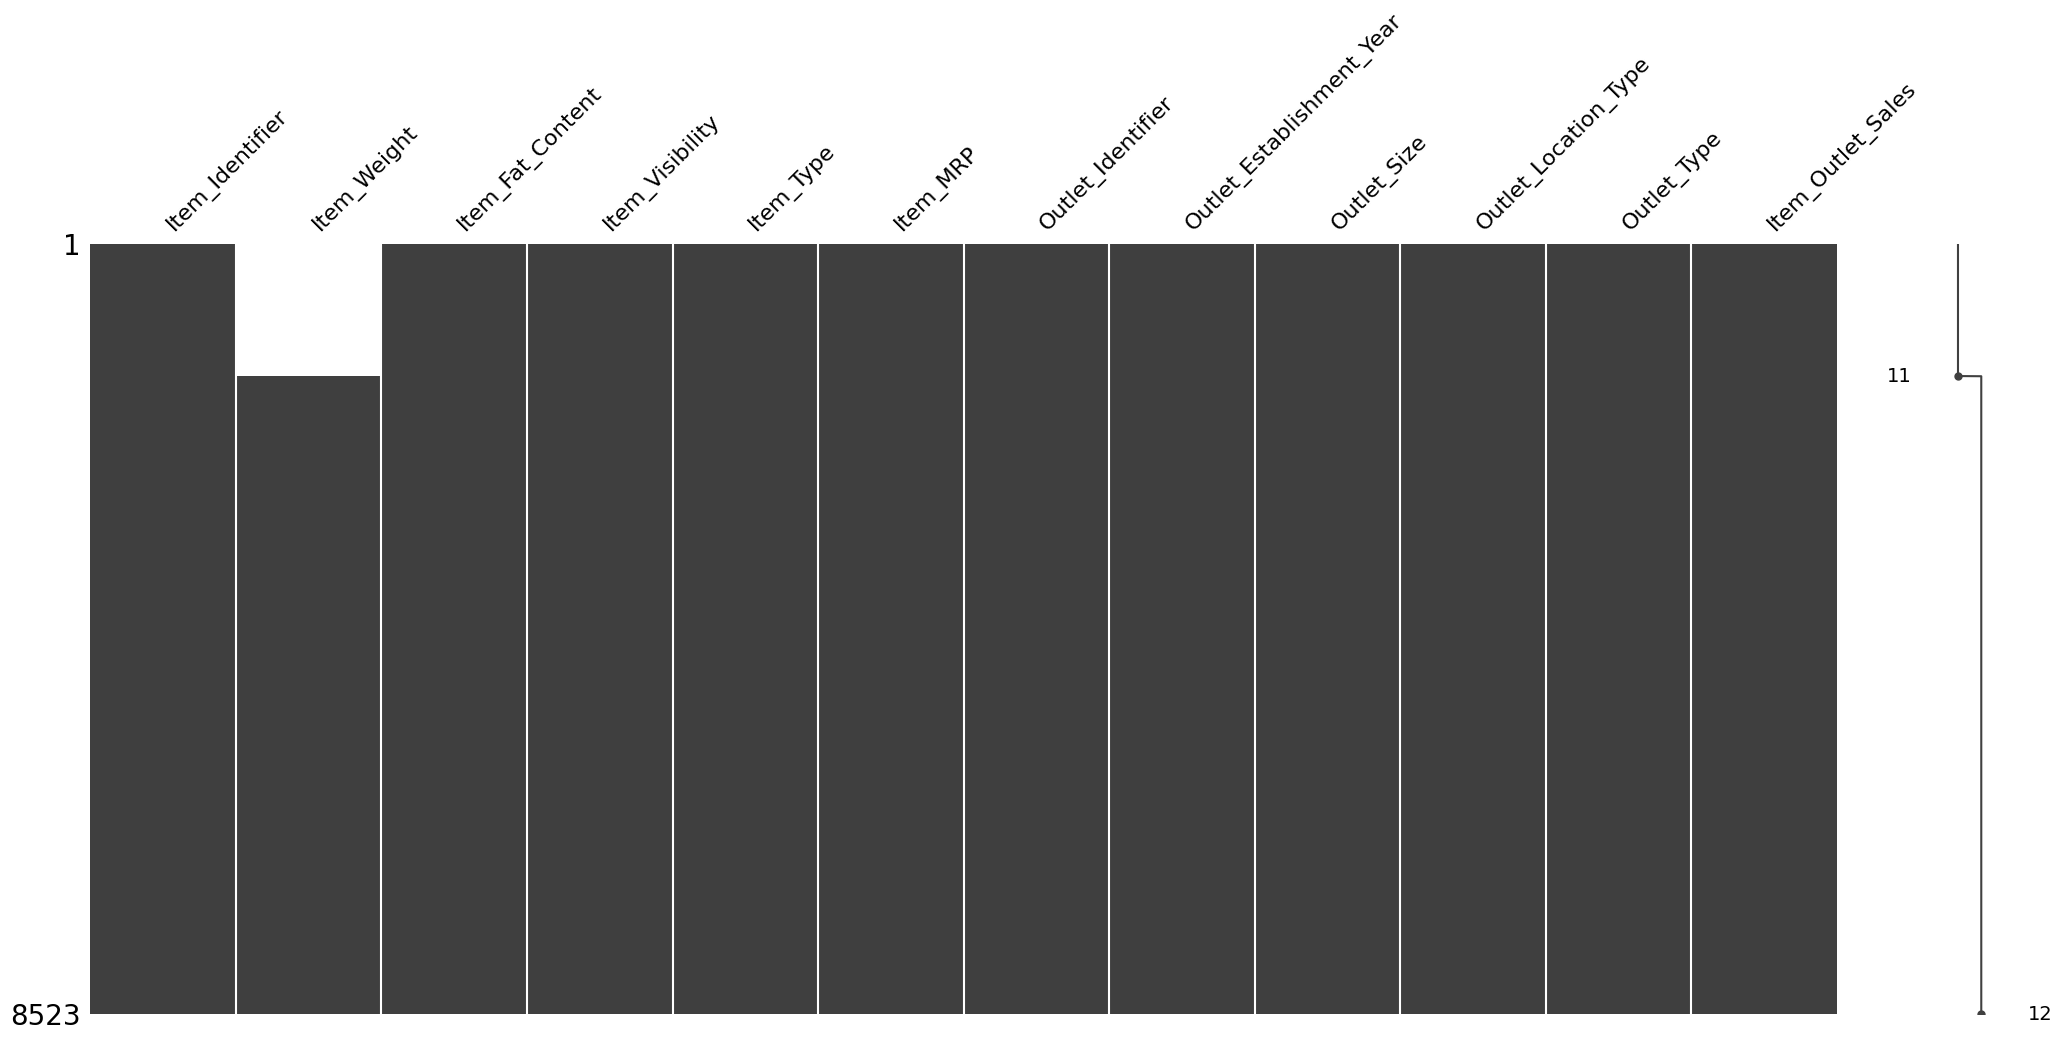

In [90]:
#sort the rows according to Item some columns
msno.matrix(temp2_df.sort_values(by='Outlet_Establishment_Year'))

In [91]:
df.groupby('Outlet_Establishment_Year')['Item_Weight'].count()

,Item_Weight
Outlet_Establishment_Year,
1985,0
1987,932
1997,930
1998,555
1999,930
2002,929
2004,930
2007,926
2009,928


All the items in the outlet that has been established in 1985 are null.

In [92]:
temp3_df=df[df['Item_Weight'].isna()]
df.groupby('Item_Type')['Item_Weight'].mean()


,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [93]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [94]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [95]:
df.groupby('Item_Type')['Item_Weight'].mean()

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


I see that all means of item weight of item type are too close , so I will fill out the null values of the item weight with the mean of its item typr

In [96]:
null_item_weight_rows=df[null_item_weight_rows_filter]
null_item_weight_rows.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [97]:
import numpy as np
for row in null_item_weight_rows:
   #null_item_weight_rows['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform('mean')
   null_item_weight_rows['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(np.mean)
null_item_weight_rows.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,12.987880,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,11.400328,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,12.277108,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,12.277108,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,12.305705,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [98]:
null_item_weight_rows.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,12.987880,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,11.400328,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,12.277108,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,12.277108,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,12.305705,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [99]:
temp4_df=df
temp_5=df
#temp4_df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform(np.mean))
df.isna().sum()
temp_5.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [100]:
temp4_df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform(np.mean), inplace=True)
temp4_df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [101]:
temp4_df.loc[7]

,7
Item_Identifier,FDP10
Item_Weight,12.98788
Item_Fat_Content,Low Fat
Item_Visibility,0.12747
Item_Type,Snack Foods
Item_MRP,107.7622
Outlet_Identifier,OUT027
Outlet_Establishment_Year,1985
Outlet_Size,Medium
Outlet_Location_Type,Tier 3


Now after we tested it at temp4 , I will do the same with our df

In [102]:
df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform(np.mean), inplace=True)
df.isna().sum()


,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [103]:
df.loc[7]

,7
Item_Identifier,FDP10
Item_Weight,12.98788
Item_Fat_Content,Low Fat
Item_Visibility,0.12747
Item_Type,Snack Foods
Item_MRP,107.7622
Outlet_Identifier,OUT027
Outlet_Establishment_Year,1985
Outlet_Size,Medium
Outlet_Location_Type,Tier 3


#### Now after we have handled the null values and dublicates , we will fix inconcestency

In [104]:
temp2_df=df.copy()
cat_cols=df.select_dtypes(include=['object']).columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [105]:
temp2_df.value_counts("Item_Fat_Content")

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [106]:

def get_value_count(cols):
  for col in cols:
    print(f'-------------------------------------------------\nValue counts for {col}')
    print(df[col].value_counts())
temp2_df=df.copy()
get_value_count(cat_cols)

-------------------------------------------------
Value counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
FDW26     9
NCQ06     9
DRN47     9
FDV38     9
FDX20     9
DRE49     9
NCI54     9
FDU12     9
FDG09     9
FDP25     9
FDF52     9
FDO19     9
FDF56     9
FDV60     9
NCF42     9
NCJ30     9
FDX04     9
FDQ40     9
FDW49     9
FDD38     9
NCB18     9
NCL31     9
DRA59     8
FDR52     8
FDC14     8
FDF04     8
FDA15     8
FDO10     8
FDA13     8
FDF22     8
FDT49     8
FDN56     8
FDW24     8
FDV26     8
NCO54     8
DRK35     8
FDA44     8
FDA50     8
FDR48     8
FDR43     8
FDE11     8
FDQ39     8
FDT40     8
NCI29     8
FDJ58     8
FDD29     8
DRF03     8
FDT55     8
FDR59     8
NCQ43     8
FDX58     8
FDX50     8
NCB31     8
FDS52     8
FDO32     8
FDY47     8
DRF23     8
FDD05     8
FDH10     8
FDW48     8
FDS55     8
FDZ33     8
FDB17     8
FDT24     8
NCM07     8
DRP35     8
NCK53     8
DRI03     8
FDL34     8
DRF01     8
F

###There is some inconsistency in the Item_Fat_Content

In [107]:
#temp2_df

temp2_df=df.copy()
temp2_df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [108]:

replace_dict={'LF':'Low Fat' , 'low fat':'Low Fat','reg':'Regular'}
temp2_df['Item_Fat_Content']=temp2_df['Item_Fat_Content'].replace(replace_dict)
temp2_df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [109]:
#temp3_df=df.copy()
temp3_df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,867
Regular,501
LF,56
low fat,28
reg,11


In [110]:

df['Item_Fat_Content']=df['Item_Fat_Content'].replace(replace_dict)
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [111]:
get_value_count(cat_cols)

-------------------------------------------------
Value counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
FDW26     9
NCQ06     9
DRN47     9
FDV38     9
FDX20     9
DRE49     9
NCI54     9
FDU12     9
FDG09     9
FDP25     9
FDF52     9
FDO19     9
FDF56     9
FDV60     9
NCF42     9
NCJ30     9
FDX04     9
FDQ40     9
FDW49     9
FDD38     9
NCB18     9
NCL31     9
DRA59     8
FDR52     8
FDC14     8
FDF04     8
FDA15     8
FDO10     8
FDA13     8
FDF22     8
FDT49     8
FDN56     8
FDW24     8
FDV26     8
NCO54     8
DRK35     8
FDA44     8
FDA50     8
FDR48     8
FDR43     8
FDE11     8
FDQ39     8
FDT40     8
NCI29     8
FDJ58     8
FDD29     8
DRF03     8
FDT55     8
FDR59     8
NCQ43     8
FDX58     8
FDX50     8
NCB31     8
FDS52     8
FDO32     8
FDY47     8
DRF23     8
FDD05     8
FDH10     8
FDW48     8
FDS55     8
FDZ33     8
FDB17     8
FDT24     8
NCM07     8
DRP35     8
NCK53     8
DRI03     8
FDL34     8
DRF01     8
F

Searching for unique features

In [112]:
df[cat_cols].nunique()

,0
Item_Identifier,1559
Item_Fat_Content,2
Item_Type,16
Outlet_Identifier,10
Outlet_Size,4
Outlet_Location_Type,3
Outlet_Type,4


In [113]:
df['Item_Identifier'].duplicated().sum()#I dont know if to drop duplicates or not

np.int64(6964)

In [114]:
df[df['Item_Identifier'].duplicated()].sort_values(by='Item_Identifier').head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1693,DRA12,11.60000,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.60000,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
1245,DRA12,11.60000,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
8043,DRA12,11.60000,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Missing,Tier 3,Grocery Store,283.6308
1197,DRA12,11.60000,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Missing,Tier 2,Supermarket Type1,3829.0158
4900,DRA24,19.35000,Regular,0.039921,Soft Drinks,163.3868,OUT035,2004,Small,Tier 2,Supermarket Type1,3439.5228
4130,DRA24,19.35000,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,Missing,Tier 3,Grocery Store,327.5736
8195,DRA24,19.35000,Regular,0.039895,Soft Drinks,162.4868,OUT013,1987,High,Tier 3,Supermarket Type1,4422.2436
4416,DRA24,11.84746,Regular,0.039735,Soft Drinks,165.7868,OUT027,1985,Medium,Tier 3,Supermarket Type3,4913.6040
2879,DRA24,11.84746,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604


In [115]:
df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT035,930
OUT049,930
OUT046,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [116]:
#x=df.groupby('Outlet_Identifier')['Item_Identifier'].value_counts()
#result = df.groupby('Category1')['Category2'].value_counts().reset_index(name='count')
x=df.groupby('Outlet_Identifier')['Item_Identifier'].value_counts().reset_index(name='count')
x.head(50)



,Outlet_Identifier,Item_Identifier,count
0,OUT010,DRA12,1
1,OUT010,DRA24,1
2,OUT010,DRA59,1
3,OUT010,DRB13,1
4,OUT010,DRB25,1
5,OUT010,DRB48,1
6,OUT010,DRC25,1
7,OUT010,DRC27,1
8,OUT010,DRD15,1
9,OUT010,DRD24,1


###cI want to try combine 'Outlet_Identifier and Item_Identifier to make unique rows ,identified with item_outlet_id

In [122]:
x=df

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [74]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Otlet_Id,,,,,,,,,,
OUT049-FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
OUT018-DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
OUT049-FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
OUT010-FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Missing,Tier 3,Grocery Store,732.3800
OUT013-NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
x['Item_Otlet_Id']=x['Outlet_Identifier']+"-"+x['Item_Identifier']
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Otlet_Id
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,OUT049-FDA15
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,OUT018-DRC01
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,OUT049-FDN15
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800,OUT010-FDX07
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,OUT013-NCD19


In [47]:
x=x.drop(columns=['Outlet_Identifier','Item_Identifier'])
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Otlet_Id
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,OUT049-FDA15
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,OUT018-DRC01
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,OUT049-FDN15
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Missing,Tier 3,Grocery Store,732.3800,OUT010-FDX07
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,OUT013-NCD19


In [48]:
#Now we will look for dublicates
x.duplicated().sum()

np.int64(0)

In [49]:
#now set the Item_Outlet_id as index
x=x.set_index('Item_Otlet_Id')
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Otlet_Id,,,,,,,,,,
OUT049-FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
OUT018-DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
OUT049-FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
OUT010-FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Missing,Tier 3,Grocery Store,732.3800
OUT013-NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
df=x
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Otlet_Id,,,,,,,,,,
OUT049-FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
OUT018-DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
OUT049-FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
OUT010-FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Missing,Tier 3,Grocery Store,732.3800
OUT013-NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
# now we will save the cleaned data to drive
df.to_csv('/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/cleaned_sales_predictions_2023.csv')

In [52]:
cleaned_df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/cleaned_sales_predictions_2023.csv')
cleaned_df.head()

,Item_Otlet_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049-FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,OUT018-DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,OUT049-FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,OUT010-FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Missing,Tier 3,Grocery Store,732.3800
4,OUT013-NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [53]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Otlet_Id              8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [54]:
cleaned_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [55]:
cleaned_df.duplicated().sum()

np.int64(0)

In [56]:
cleaned_df.isna().sum()

,0
Item_Otlet_Id,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


In [57]:
cleaned_df.shape

(8523, 11)

##Exploratory Data Analysis

In [58]:
cleaned_df.head()

,Item_Otlet_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049-FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,OUT018-DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,OUT049-FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,OUT010-FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Missing,Tier 3,Grocery Store,732.3800
4,OUT013-NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [59]:
import seaborn as sns
import matplotlib as plt

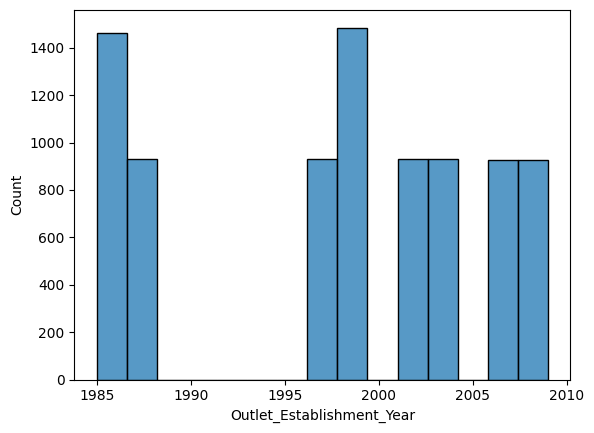

In [143]:
# a histogram to view the distribution of Outlet_Establishment_Year
ax=sns.histplot(data =cleaned_df,x='Outlet_Establishment_Year')


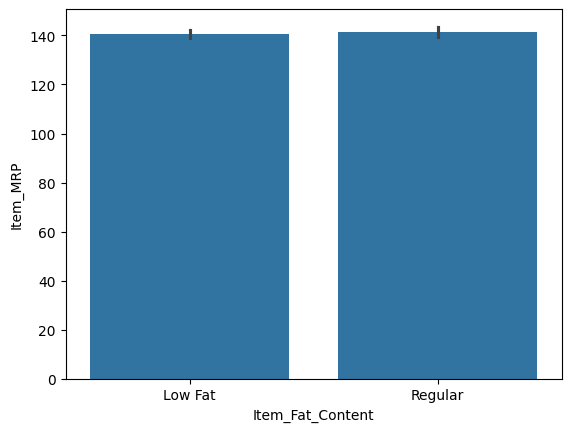

In [62]:
# now i want to see the MRP average of items according to it's fat content (Item_fat_Content vs Item_MRP )
ax =sns.barplot(data=cleaned_df, x='Item_Fat_Content', y='Item_MRP')

**We notice that the MRP is almost the same for low fat and regular fat content**

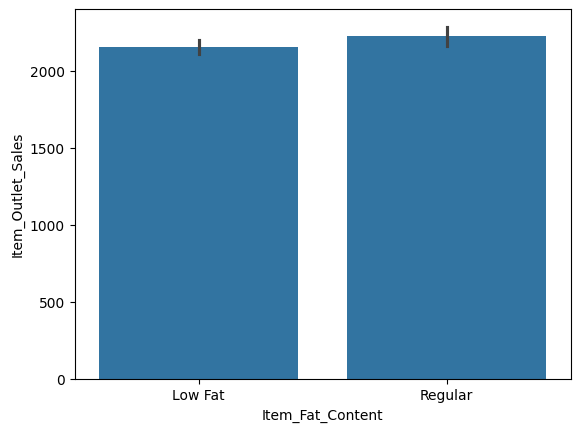

In [63]:
# now i want to see the MRP average of items according to it's fat content (Item_fat_Content vs Item_MRP )
ax =sns.barplot(data=cleaned_df, x='Item_Fat_Content', y='Item_Outlet_Sales')

**It is almost the same , but The avg of item outlet sales for regular items is alittle bit higher from low fat items**

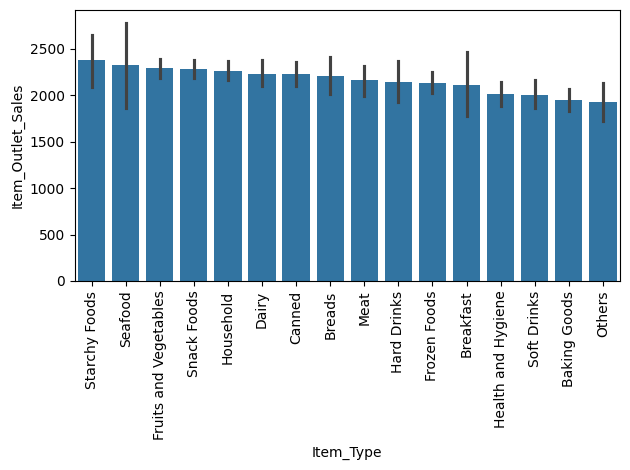

In [142]:
#I want to see if there is a relation obetween Item_Type and Item_Outlet_Sales
order = cleaned_df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).index
ax=sns.barplot(data=cleaned_df,x='Item_Type',y='Item_Outlet_Sales',order=order)
ax.tick_params(axis='x',rotation=90)
fig=ax.get_figure()
fig.tight_layout()
fig.savefig('Item_Type VS Item_Outlet_Sales.png', dpi = 300, facecolor='white')

- **The starchy foods and seafood are the most sold in all Outlets**

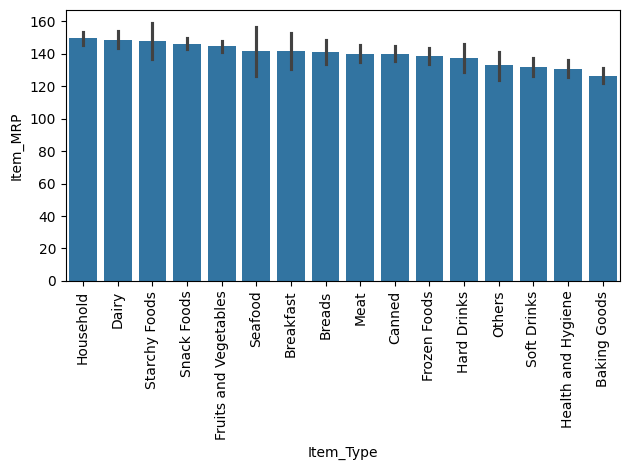

In [139]:
#I want to see if there is a relation obetween Item_Type and Item_Outlet_Sales
#df.sort_values('Growth',ascending = False).State)
order = cleaned_df.groupby('Item_Type')['Item_MRP'].mean().sort_values(ascending=False).index
ax=sns.barplot(data=cleaned_df,x='Item_Type',y='Item_MRP',order=order)
ax.tick_params(axis='x',rotation=90)
fig=ax.get_figure()
fig.tight_layout()
#fig.savefig('Item_Type VS Item_MPR', dpi = 300, facecolor='white')

- **HouseHolds items have the most MRP**

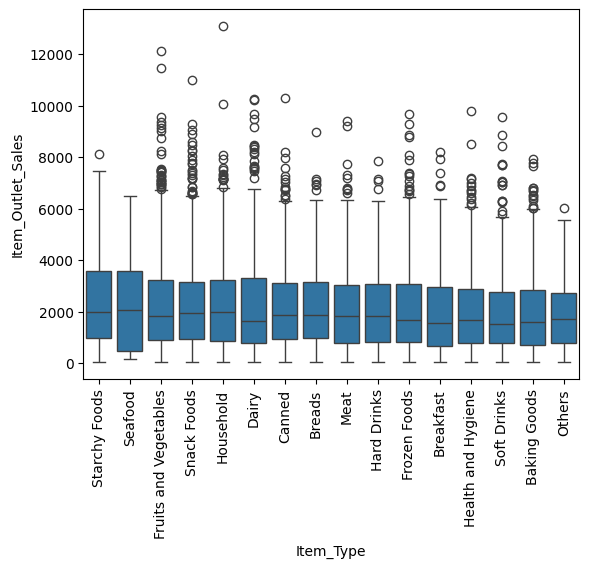

In [140]:

order = cleaned_df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).index
ax=sns.boxplot(data=cleaned_df,x='Item_Type',y='Item_Outlet_Sales',order=order)
ax.tick_params(axis='x',rotation=90)

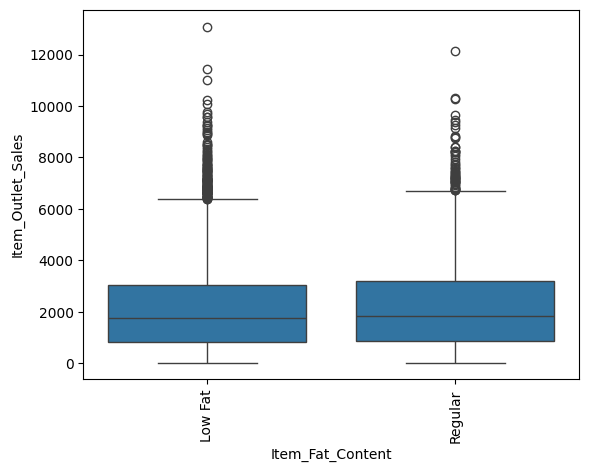

In [67]:
#I want to see The destribution of  Item_Outlet_Sales according to Item_Type
ax=sns.boxplot(data=cleaned_df,x='Item_Fat_Content',y='Item_Outlet_Sales')
ax.tick_params(axis='x',rotation=90)

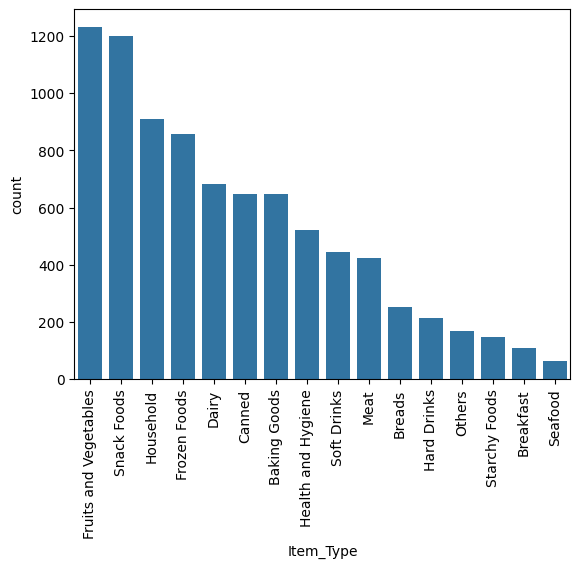

In [167]:
#I want to see how many items are there in each
order = cleaned_df['Item_Type'].value_counts().index
ax=sns.countplot(data=cleaned_df,x='Item_Type',order=order)
ax.tick_params(axis='x',rotation=90)
fig.tight_layout()
fig.savefig('Item_Type Counts.png', dpi = 300, facecolor='white')

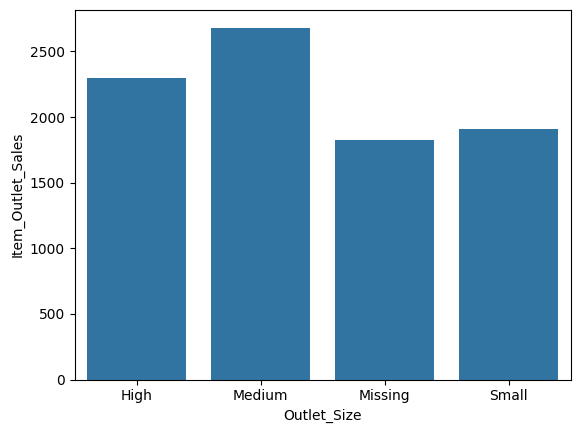

In [159]:
#Is there a relation between the outlet_size and its sales
z=x.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()
z.head()
ax=sns.barplot(data=z)


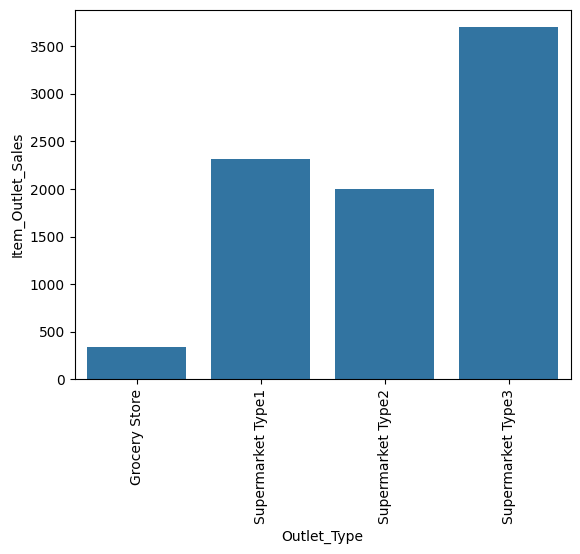

In [166]:
#How the item outlet sales are affected according to outlet type?
z=x.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
z.head()
ax=sns.barplot(data=z)
ax.tick_params(axis='x',rotation=90)
fig.tight_layout()
fig.savefig('item outlet sales vs outlet type.png', dpi = 300, facecolor='white')

**The sales for supermarkets type 3 are so much higher than the other types , and the grocery stores have the least sales**

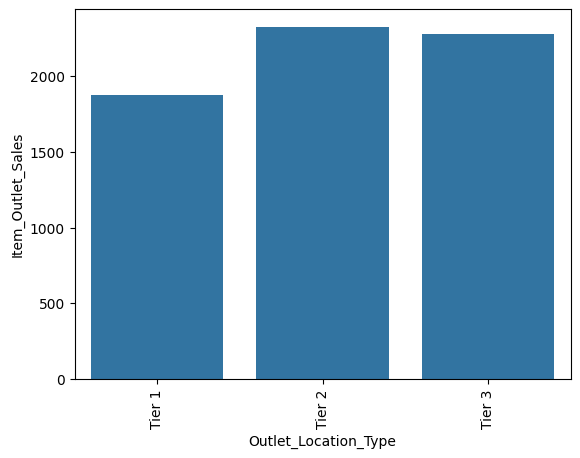

In [163]:
#How the location affects the item outlet sales ?
z=x.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()
z.head()
ax=sns.barplot(data=z)
ax.tick_params(axis='x',rotation=90)

**Outlets in Tier 2 have the most sales**

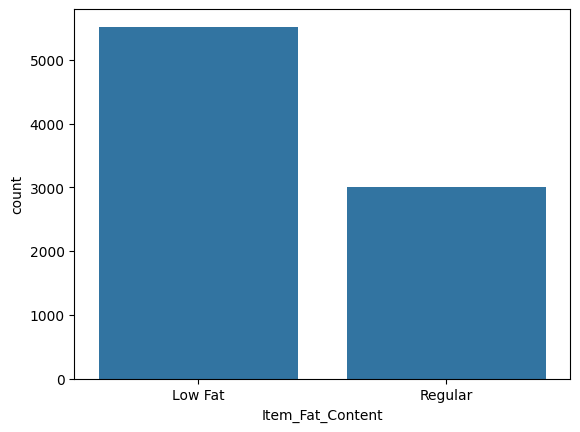

In [69]:
ax=sns.countplot(data=cleaned_df,x='Item_Fat_Content')

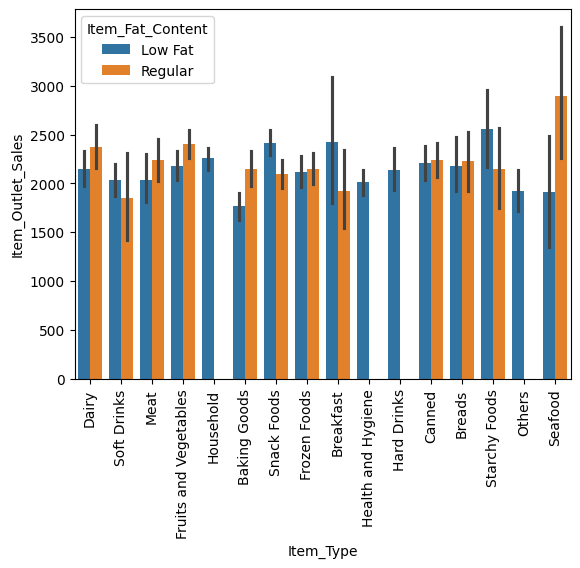

In [168]:
ax=sns.barplot(data=cleaned_df,hue='Item_Fat_Content',y='Item_Outlet_Sales',x='Item_Type')
ax.tick_params(axis='x',rotation=90)
fig.tight_layout()
fig.savefig('item outlet sales vs item type hue fat content.png', dpi = 300, facecolor='white')

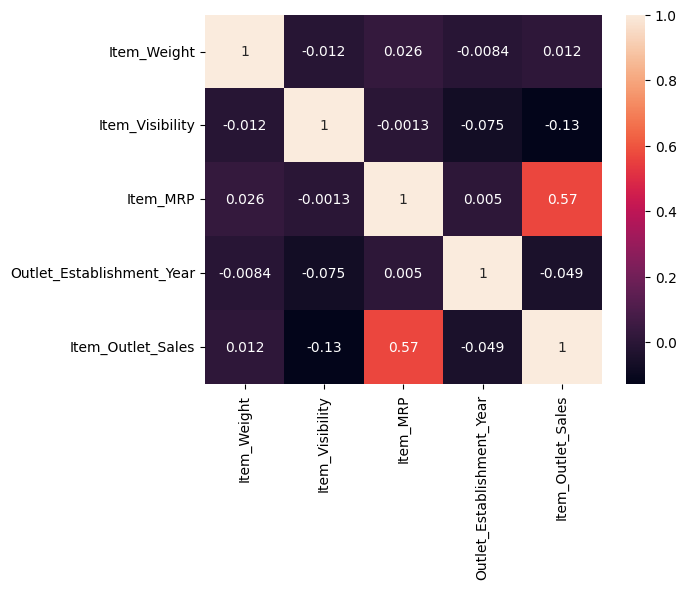

In [169]:
corr=cleaned_df.corr(numeric_only=True)
ax=sns.heatmap(corr,annot=True)

fig.tight_layout()
fig.savefig('data corr.png', dpi = 300, facecolor='white')

**There is a moderate positive correlation between Item_MRP and Item Oulet sales**

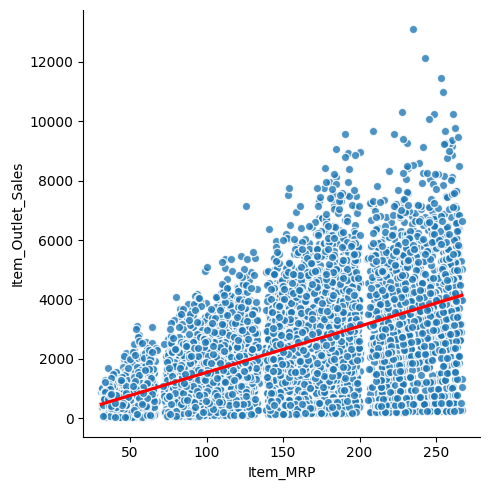

In [72]:
scatter_kws=dict(edgecolor='white')
line_kws=dict(color='red')
ax=sns.lmplot(data=cleaned_df,x='Item_MRP',y='Item_Outlet_Sales',scatter_kws=scatter_kws,line_kws=line_kws)

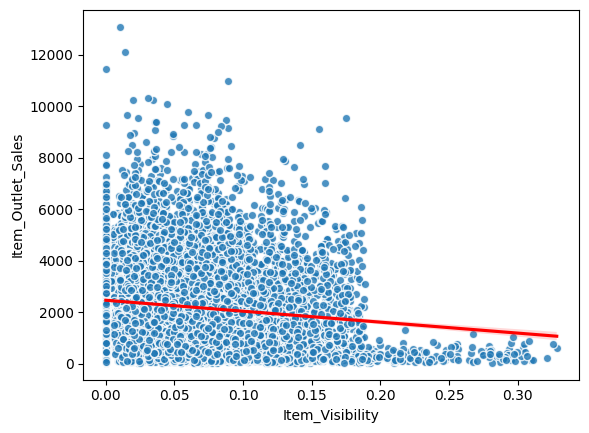

In [73]:
ax=sns.regplot(data=cleaned_df,x='Item_Visibility',y='Item_Outlet_Sales',scatter_kws=scatter_kws,line_kws=line_kws)

**I think there is misleading in the data set , because the visability of an item should increase the items sales**

##Feature Inspection